# Analyzing and Segmenting Geographic Locations in Nepal

## Objectives
- Cluster geographic locations (cities) based on crime rate, population density, and income level.
- Identify patterns or similarities among different locations.

## 1. Data Preparation
Let's start by creating dummy data for 10 cities in Nepal. We'll generate attributes such as crime rate, population density, and income level.

In [5]:
import pandas as pd
import numpy as np

# Create a DataFrame with dummy data
data = {
    'City': ['Kathmandu', 'Pokhara', 'Lalitpur', 'Biratnagar', 'Birgunj', 'Dharan', 'Bharatpur', 'Hetauda', 'Butwal', 'Nepalgunj'],
    'Crime_Rate': np.random.uniform(1, 10, 10),  # Random crime rate between 1 and 10
    'Population_Density': np.random.uniform(1000, 10000, 10),  # Random population density
    'Income_Level': np.random.uniform(20000, 100000, 10)  # Random income level
}

df = pd.DataFrame(data)
print("Data Preparation:\n", df)

Data Preparation:
          City  Crime_Rate  Population_Density  Income_Level
0   Kathmandu    6.095755         2547.974475  52205.725752
1     Pokhara    4.928258         3005.699699  23316.163946
2    Lalitpur    9.041759         9428.861305  95839.420840
3  Biratnagar    8.884215         4788.355679  83934.564936
4     Birgunj    7.189152         8730.264906  36094.569105
5      Dharan    9.165374         9882.011498  37070.495251
6   Bharatpur    2.604649         9338.680284  60238.694314
7     Hetauda    1.287517         5342.555557  25871.359545
8      Butwal    7.519413         3448.632748  48352.353898
9   Nepalgunj    1.459499         3092.751837  42960.277435


## 2. Data Normalization
Normalize the data to ensure each feature contributes equally to the clustering process.

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the features
df_scaled = scaler.fit_transform(df[['Crime_Rate', 'Population_Density', 'Income_Level']])
df_scaled_df = pd.DataFrame(df_scaled, columns=['Crime_Rate', 'Population_Density', 'Income_Level'])
print("Normalized Data:\n", df_scaled_df)

Normalized Data:
    Crime_Rate  Population_Density  Income_Level
0    0.094595           -1.183414      0.071858
1   -0.302388           -1.024686     -1.211671
2    1.096322            1.202722      2.010450
3    1.042753           -0.406501      1.481532
4    0.466382            0.960465     -0.643942
5    1.138355            1.359865     -0.600583
6   -1.092484            1.171449      0.428753
7   -1.540347           -0.214317     -1.098147
8    0.578680           -0.871086     -0.099343
9   -1.481868           -0.994498     -0.338907


## 3. Exploratory Data Analysis (EDA)
Perform EDA to understand the data better through visualizations.

#### Pairplot to visualize relationships

D:\Apps\APP_DATA\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\APP_DATA\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\APP_DATA\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\APP_DATA\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


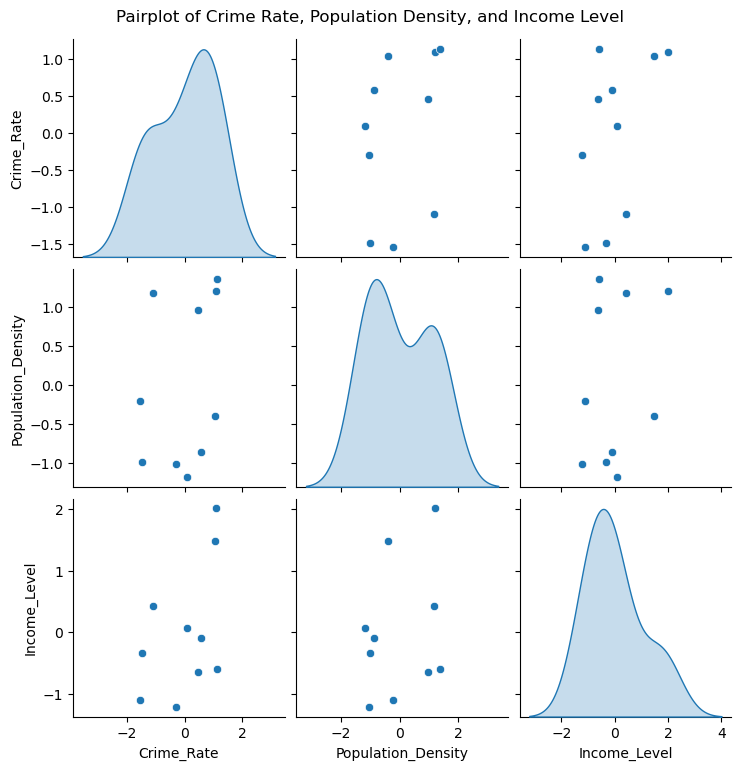

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add normalized data to original dataframe for plotting
df_plot = df.copy()
df_plot[['Crime_Rate', 'Population_Density', 'Income_Level']] = df_scaled_df

# Pairplot
sns.pairplot(df_plot, diag_kind='kde')
plt.suptitle('Pairplot of Crime Rate, Population Density, and Income Level', y=1.02)
plt.show()

#### Heatmap to visualize correlations

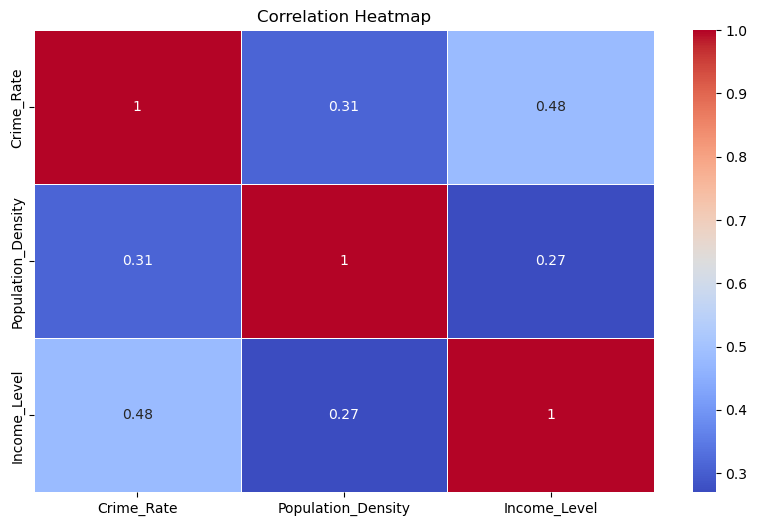

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Crime_Rate', 'Population_Density', 'Income_Level']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Boxplots to visualize distributions

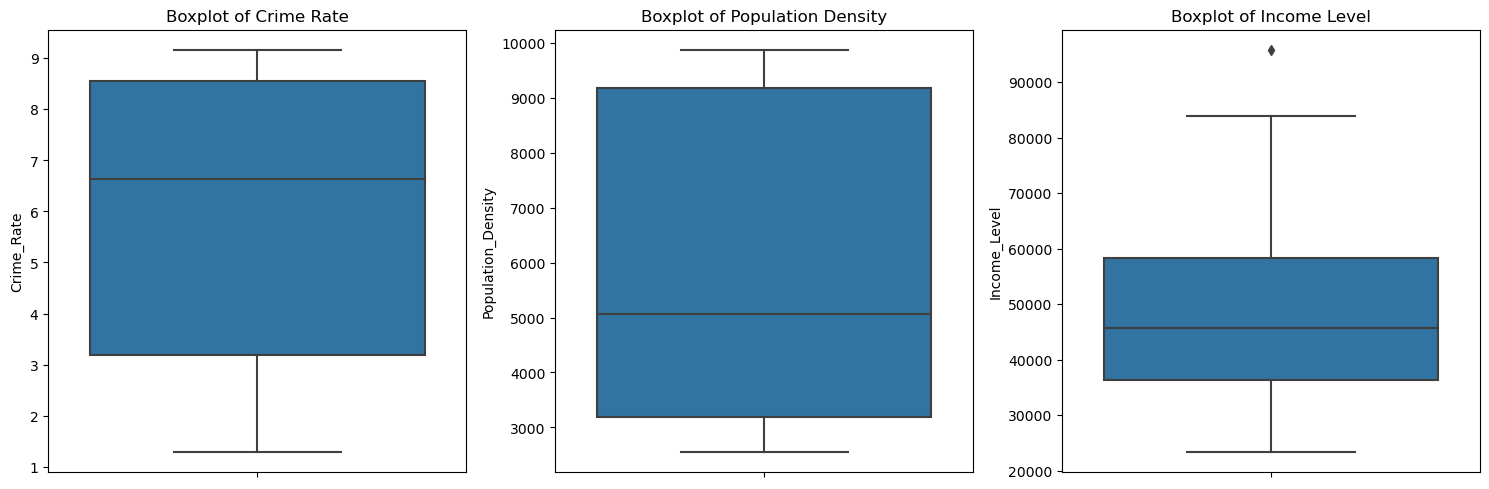

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y='Crime_Rate', data=df)
plt.title('Boxplot of Crime Rate')

plt.subplot(1, 3, 2)
sns.boxplot(y='Population_Density', data=df)
plt.title('Boxplot of Population Density')

plt.subplot(1, 3, 3)
sns.boxplot(y='Income_Level', data=df)
plt.title('Boxplot of Income Level')

plt.tight_layout()
plt.show()

## 4. Clustering
Use the K-Means algorithm to cluster the cities.

In [21]:
from sklearn.cluster import KMeans

# Define the number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

print("Cluster Assignments:\n", df)

D:\Apps\APP_DATA\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Apps\APP_DATA\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Assignments:
          City  Crime_Rate  Population_Density  Income_Level  Cluster
0   Kathmandu    6.095755         2547.974475  52205.725752        0
1     Pokhara    4.928258         3005.699699  23316.163946        0
2    Lalitpur    9.041759         9428.861305  95839.420840        2
3  Biratnagar    8.884215         4788.355679  83934.564936        2
4     Birgunj    7.189152         8730.264906  36094.569105        1
5      Dharan    9.165374         9882.011498  37070.495251        1
6   Bharatpur    2.604649         9338.680284  60238.694314        1
7     Hetauda    1.287517         5342.555557  25871.359545        0
8      Butwal    7.519413         3448.632748  48352.353898        0
9   Nepalgunj    1.459499         3092.751837  42960.277435        0


## 5. Visualizing the Clusters
Visualize the clusters to identify patterns or similarities.

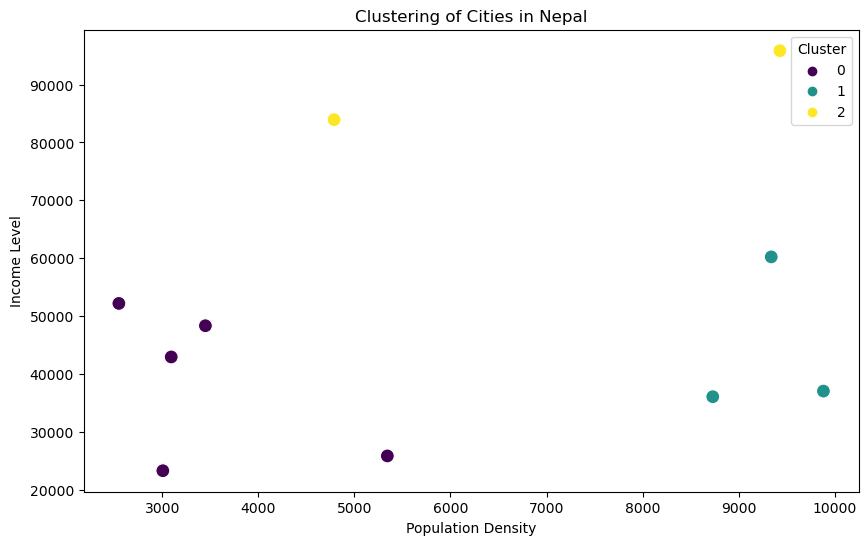

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population_Density', y='Income_Level', hue='Cluster', data=df, palette='viridis', s=100)
plt.xlabel('Population Density')
plt.ylabel('Income Level')
plt.title('Clustering of Cities in Nepal')
plt.legend(title='Cluster')
plt.show()

## 6. Analysis
Analyze the clusters to identify patterns or similarities.

In [27]:
for cluster in range(3):
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster])
    print("\n")

Cluster 0:
        City  Crime_Rate  Population_Density  Income_Level  Cluster
0  Kathmandu    6.095755         2547.974475  52205.725752        0
1    Pokhara    4.928258         3005.699699  23316.163946        0
7    Hetauda    1.287517         5342.555557  25871.359545        0
8     Butwal    7.519413         3448.632748  48352.353898        0
9  Nepalgunj    1.459499         3092.751837  42960.277435        0


Cluster 1:
        City  Crime_Rate  Population_Density  Income_Level  Cluster
4    Birgunj    7.189152         8730.264906  36094.569105        1
5     Dharan    9.165374         9882.011498  37070.495251        1
6  Bharatpur    2.604649         9338.680284  60238.694314        1


Cluster 2:
         City  Crime_Rate  Population_Density  Income_Level  Cluster
2    Lalitpur    9.041759         9428.861305  95839.420840        2
3  Biratnagar    8.884215         4788.355679  83934.564936        2




## Conclusion
This notebook demonstrated how to perform detailed exploratory data analysis (EDA) and clustering of geographic locations based on various criteria using dummy data. By normalizing the data, applying K-Means clustering, and visualizing the results, we identified patterns and similarities among different cities in Nepal.